/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([19, 1])) that is different to the input size (torch.Size([1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Streaming output truncated to the last 5000 lines.
epoch:5001
epoch:5002
epoch:5003
epoch:5004
epoch:5005
epoch:5006
epoch:5007
epoch:5008
epoch:5009
epoch:5010
epoch:5011
epoch:5012
epoch:5013
epoch:5014
epoch:5015
epoch:5016
epoch:5017
epoch:5018
epoch:5019
epoch:5020
epoch:5021
epoch:5022
epoch:5023
epoch:5024
epoch:5025
epoch:5026
epoch:5027
epoch:5028
epoch:5029
epoch:5030
epoch:5031
epoch:5032
epoch:5033
epoch:5034
epoch:5035
epoch:5036
epoch:5037
epoch:5038
epoch:5039
epoch:5040
epoch:5041
epoch:5042
epoch:5043
epoch:5044
epoch:5045
epoch:5046
epoch:5047
epoch:5048
epoch:5049
epoch:5050
epoch:5051
epoch:5052
epoch:5053
epoch:5054
epoch:5055
epoch:5056
epoch:5057
epoch:5058
epoch:5059
epoch:5060
epoch:5061
epoch:5062
epoch:5063
epoch:5064
epoch:5065
epoch:5066
epoch:5067
epoch:5068
epoch:5069
epoch:5070
epoch:5071
epoch:5072
epoch:5073
epoch:5074
epoch:5075
epoch:5076
epoch:5077
epoch:5078
epoch:5079
epoch:5080
epoch:5081
epoch:5082
epoch:5083
epoch:5084
epoch:5085
epoch:5086
epo

ValueError: ignored

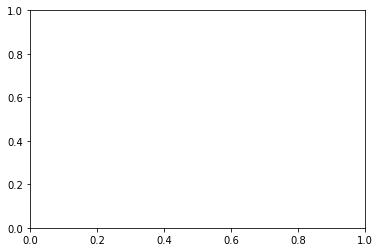

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data = pd.read_csv('/content/Life Expectancy Data.csv')
data = data.to_numpy()
data = data[1:,3:]
data_train = data[0:1000]
data_test = data[1000:]
x_train_numpy = data_train[:,0]
y_train_numpy = data_train[0,:]
x_train = torch.from_numpy(x_train_numpy.astype(np.float32))
y_train = torch.from_numpy(y_train_numpy.astype(np.float32))
x = x_train.view(1,x_train.shape[0])
y = y_train.view(y_train.shape[0],1)
n_samples,n_features = data_train.shape
input_size = n_samples
output_size = n_samples
model = nn.Linear(input_size,output_size)
criterion = nn.MSELoss()
learning_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), learning_rate)
num_epoch = 10000
for epoch in range(num_epoch):
  y_predicted = model(x_train)
  loss = criterion(y_predicted,y)
  loss.backward()
  optimiser.step()
  optimiser.zero_grad()
  if epoch + 1 % 10:
    print(f'epoch:{epoch + 1}')

plt.plot(x,y,'ro')
plt.plot(x,y_predicted,'b')
